In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score

In [50]:
# Load data, csv contains mails with a text and a label (spam or not spam)
# The goal is to predict if a mail is spam or not spam based on the text
file_path = 'data/phishing_email.csv'
data = pd.read_csv(file_path)

In [67]:
data.tail()

,text_combined,label
82481,info advantageapartmentscom infoadvantageapart...,1
82482,monkeyorg helpdeskmonkeyorg monkeyorg hi josep...,1
82483,help center infohelpcentercoza_infohelpcenterc...,1
82484,metamask infosofamekarcom verify metamask wall...,1
82485,fastway infofastwaycoza_infofastwaycoza_infofa...,1


In [52]:
data['label'].value_counts()

1    42891
0    39595
Name: label, dtype: int64

In [68]:
# Split data into training and test sets
X = data[['text_combined']]
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [69]:
# Create a pipeline that will vectorize the text data and train a Naive Bayes classifier
# Naive Bayes is a simple and fast classifier that works well with text data
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train['text_combined'], y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [72]:
# Evaluate the model
y_pred = model.predict(X_test['text_combined'])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7901
           1       0.99      0.96      0.97      8597

    accuracy                           0.97     16498
   macro avg       0.97      0.97      0.97     16498
weighted avg       0.97      0.97      0.97     16498


In [61]:
# The recall for spam is still low, let's try to use a different classifier
from sklearn.ensemble import RandomForestClassifier
model = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
model.fit(X_train['text_combined'], y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomforestclassifier', RandomForestClassifier())])

In [45]:
# Evaluate the model
y_pred = model.predict(X_test['text_combined'])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3490
           1       0.99      0.99      0.99      4341

    accuracy                           0.99      7831
   macro avg       0.99      0.99      0.99      7831
weighted avg       0.99      0.99      0.99      7831


In [62]:
# The recall for spam is better but the accuracy is lower
# Let's try to tune the hyperparameters of the RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'randomforestclassifier__n_estimators': [10, 50, 100],
    'randomforestclassifier__max_depth': [None, 10, 50],
}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train['text_combined'], y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [None, 10, 50],
                         'randomforestclassifier__n_estimators': [10, 50, 100]})

In [64]:
# Evaluate the model
y_pred = grid.predict(X_test['text_combined'])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7962
           1       0.99      0.98      0.98      8536

    accuracy                           0.98     16498
   macro avg       0.98      0.98      0.98     16498
weighted avg       0.98      0.98      0.98     16498


In [65]:
# The recall for spam is better and the accuracy is also better
# The RandomForestClassifier with the best hyperparameters is the best model
# We can now use this model to predict if a mail is spam or not spam
# We can also save the model to use it later

In [66]:
import joblib
joblib.dump(grid, 'model/model_phishing.pkl')

['model/model_phishing.pkl']

In [ ]:
# Statistiques pour la page Performance

In [73]:
data['label'].value_counts()


1    42891
0    39595
Name: label, dtype: int64

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7901
           1       0.99      0.96      0.97      8597

    accuracy                           0.97     16498
   macro avg       0.97      0.97      0.97     16498
weighted avg       0.97      0.97      0.97     16498


In [81]:
from sklearn.metrics import confusion_matrix

# import 'model/model_phishing.pkl' to use the model for confusion matrix
model = joblib.load('model/model_phishing.pkl')
y_pred = model.predict(X_test['text_combined'])

confusion_matrix(y_test, y_pred)

array([[7885,   16],
       [  42, 8555]])

In [78]:
grid.best_params_

{'randomforestclassifier__max_depth': None,
 'randomforestclassifier__n_estimators': 100}

In [ ]:
# Nuage de mots pour les mails de phishing

In [91]:
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data[data['label'] == 1]['text_combined']))

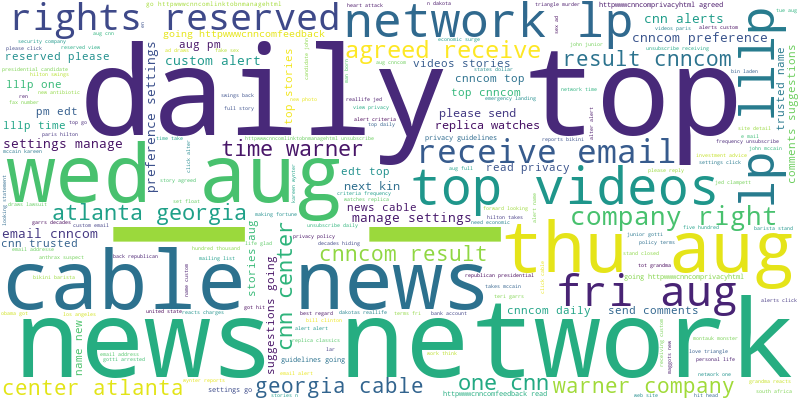

In [86]:
wordcloud_spam.to_image()

In [ ]:
# Nuage de mots pour les mails non spam

In [92]:
wordcloud_non_spam = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data[data['label'] == 0]['text_combined']))

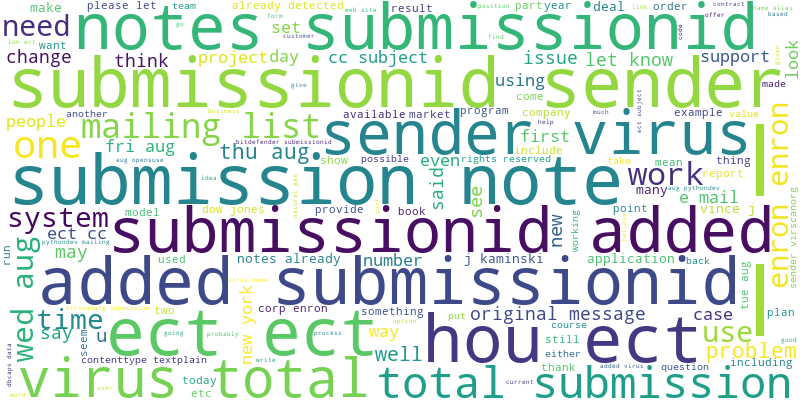

In [88]:
wordcloud_non_spam.to_image()